# **Not an ideal network**

##  Installing and Importing Keras Package

In [1]:
# https://keras.io/

# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
# Performing pip installation of Keras and then inporting it
!pip install -q keras
import keras

Using TensorFlow backend.


## Importing Desired Modules  and Classes for this Model

In [0]:
# Used for scientific computing in Python
import numpy as np

# Used to create models layer-by-layer 
from keras.models import Sequential

# Used to Flattens the input
from keras.layers import Flatten

# Used to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs
from keras.layers import Convolution2D

# Used for Array and list manipulation
from keras.utils import np_utils

# The MNIST dataset is one of the most common datasets used for image classification 
# taken from American Census Bureau employees and American high school students
from keras.datasets import mnist

## Loading the Training and Test data from MNIST 

In [5]:
# Loading dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


## Importing and demoing the purpose of Matpotlib

(60000, 28, 28)


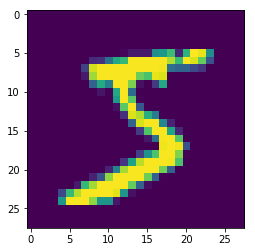

In [25]:
# Outputing the shape of X_train as a tuple with dimension (num_samples, 28, 28)
print (X_train.shape)

# Matplotlib is a python library used to create 2D graphs and plots
from matplotlib import pyplot as plt

# With this backend, the output of plotting commands is displayed inline within frontends
%matplotlib inline

# Used to display the first training data which is digit '5'
plt.imshow(X_train[0])

## Reshaping the 'X'  Training and Test Data to be compatible with Convolution2D



*   mnist.load_data() supplies the MNIST digits with structure (nb_samples, 28, 28) i.e. with 2 dimensions per example representing a greyscale image 28x28.
*   The Convolution2D layers in Keras however, are designed to work with 3 dimensions per example. They have 4-dimensional inputs and outputs
*  This covers colour images (nb_samples, nb_channels, width, height)
* The greyscale image for MNIST digits input would either need a different CNN layer design or the design could simply use a standard CNN and you must explicitly express the examples as 1-channel images
* The Keras team chose the latter approach, which needs the re-shape with 1 channel image.



In [0]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

##  Scaling or Normalizing the inputs

In [0]:
# It is most common to use 32-bit precision when training a neural network
# Since the dataset fits easily in RAM, we might as well convert to float immediately.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 255 is the maximum value of a byte and this division will ensure that the input features are scaled between 0.0 and 1.0
X_train /= 255
X_test /= 255

In [42]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

# to_categorical converts this into a matrix with as many columns as there are classes
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [44]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## The Model

In [45]:
from keras.layers import Activation, MaxPooling2D

# instantiating a model of type Sequential
model = Sequential() 

# adding a convolution layer with input image 28,28,1 with 32 kernels of 3 *3 
# also performing an activation of type 'rectified linear Unit'


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Receptive Field = 3 * 3 and input channel = (28,28,1)
model.add(Convolution2D(64, 3, 3, activation='relu')) # Receptive Field = 5 * 5 and input channel = (26,26,32)
model.add(Convolution2D(128, 3, 3, activation='relu')) # Receptive Field = 7 * 7 and input channel = (24,24,64)

# adding a maxpooling layer of size 2 * 2
model.add(MaxPooling2D(pool_size=(2, 2))) # Receptive Field = 14 * 14 and input channel = (22,22,128)

# continue adding convolution layers with different number of kernels
model.add(Convolution2D(256, 3, 3, activation='relu')) # Receptive Field = 16 * 16 and input channel = (11,11,128)
model.add(Convolution2D(512, 3, 3, activation='relu')) # Receptive Field = 18 * 18 and input channel = (9,9,256)
model.add(Convolution2D(1024, 3, 3, activation='relu')) # Receptive Field = 20 * 20 and input channel = (7,7,512)
model.add(Convolution2D(2048, 3, 3, activation='relu')) # Receptive Field = 22 * 22 and input channel = (5,5,1024)

# adding a convolution layer where we have 10 kernels as that would be equal to 10 digits/ classes
model.add(Convolution2D(10, 3, 3, activation='relu')) # Receptive Field = 24 * 24 input channel = (3,3,2048)

# We need to convert the multidimensional tensor into a single 1-D tensor, so we use Flatten
model.add(Flatten()) # Receptive Field = 24 * 24 input channel = (1,1,10)

# softmax calculates the probabilities of each target class over all possible target classes
model.add(Activation('softmax'))

# prints a summary representation of our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib

## Compiling a Model to Train

In [0]:
# Configures the model for training with 3 params which are loss, optimizer and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training the model for a given number of epochs

In [47]:
# The model is trained for 10 epochs with batch size of 32
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 2.3026 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

## Evaluating the Model

In [0]:
# Evaluating our trained model. Its output is accuracy or loss and not prediction to your input data
score = model.evaluate(X_test, Y_test, verbose=0)

In [49]:
print(score)

[2.3025851249694824, 0.098]


## Predicting the Output Data

In [0]:
# actually predicts, and its output is target value, predicted from your input data
y_pred = model.predict(X_test)

In [51]:
# Slicing the Prediction and and Test data
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


## Issue with the Model

__The issue with the model is that__

- The convolution should be performed until we get a global receptive field equal to the size of the input image i.e we need to perform convolution until we have all the details of the input image but this model stops at  24 x 24 instead of 28 x 28

- So we dont have the complete information of the input image in this Model.

- Also we can optimize on the number of Kernels that has been used.Need not have as many as 2048.Lesser the number of kernels,it will reduce the number of parameters and inturn help us in GPU RAM usage.


